# Computation speed

In this notebook are collected the average computation speeds of the different models for different cases
___

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from specs_utils import get_specs
get_specs()

Spec,Value
Machine,x86_64
Platform,Linux-5.4.0-37-generic-x86_64-with-glibc2.29
Architecture,"(64bit, ELF)"
Cores,Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
Number of cores,8
Python version,3.8.2


___
## AngularModel
We test the initialization, encode and decode time for a input of .5 on each dimension, for increasing dimensions ($n \in [0,26]$)

In [3]:
from qrobot.models import AngularModel

In [4]:
def test_model(n):
    
    init_time = list()
    encode_time = list()
    decode_time = list()
    
    for i in range(1,100):
        # Initialization
        start_init = time.time()
        model = AngularModel(n,1)
        # Encoding
        start_encode = time.time()
        for dim in range(1, model.n+1):
            model.encode(.5, dim)
        # Decoding
        start_decode = time.time()
        result = model.decode()
        end_process = time.time()
        
        # Store timings
        init_time.append(start_encode - start_init)
        encode_time.append(start_decode - start_encode)
        decode_time.append(end_process - start_decode)
        
    return n, np.mean(init_time), np.mean(encode_time), np.mean(decode_time)

table = list()

for i in range(1,27):
    print(f"Test no.{i}", end="\r")
    table.append(test_model(i))
print("             ")

df = pd.DataFrame(table, columns=["n","Initialization", "Encode", "Decode"])

Plotting the results:

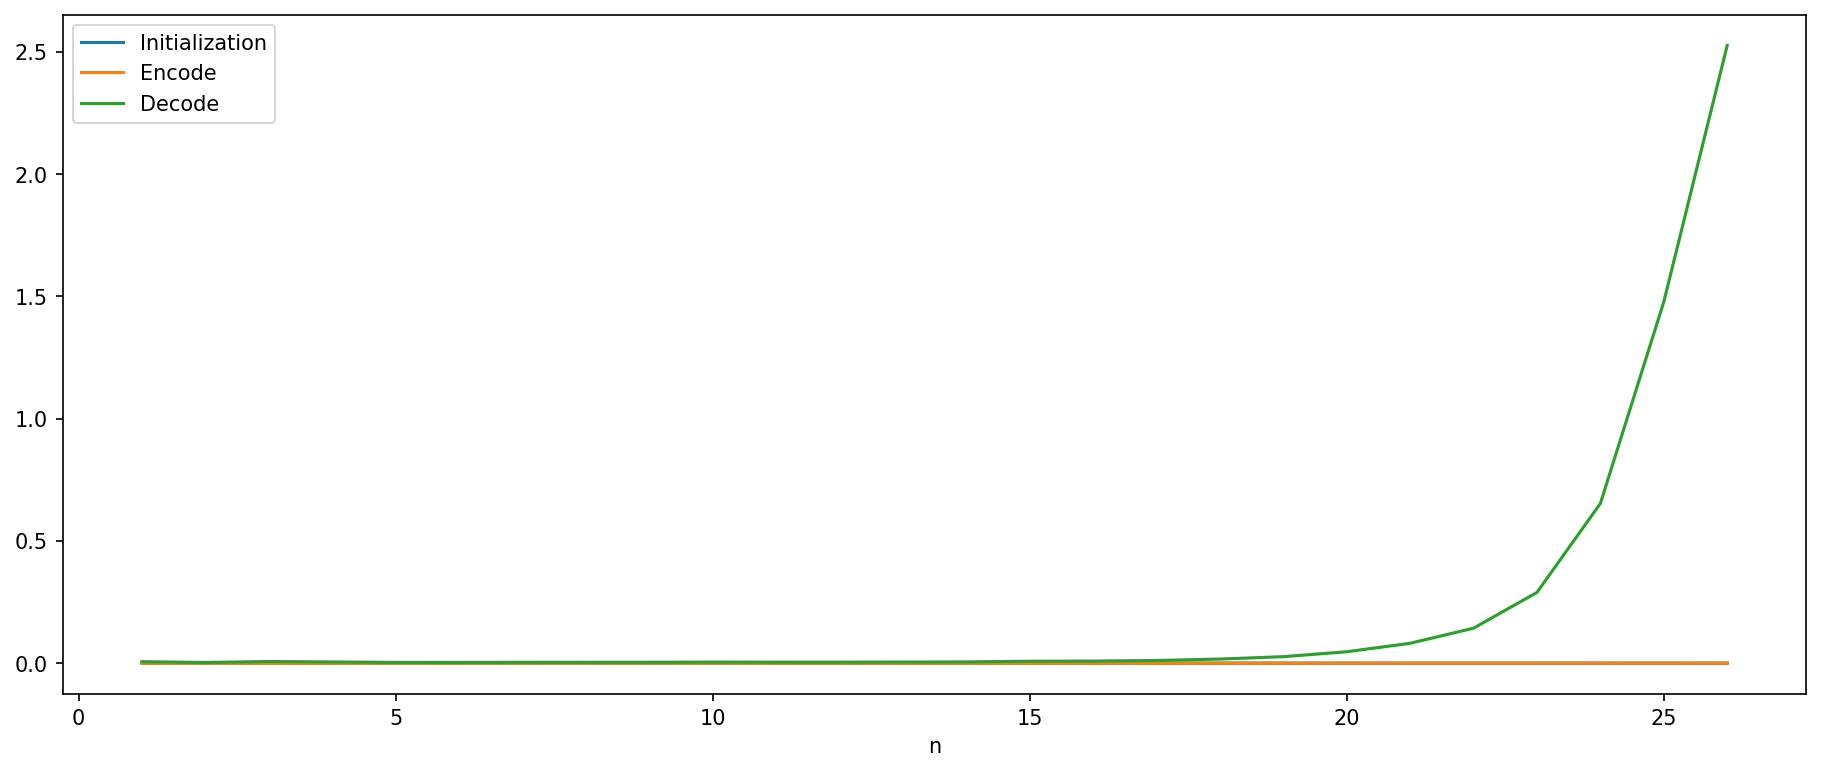

In [9]:
fig = plt.figure(figsize=(15,6), dpi=150)
df.plot(x ='n', y=[1,2,3], kind = 'line',  ax = plt.gca())
plt.show()

We can notice how the decode time is the one which takes longer for bigger values of $n$.
If we consider only the initialization and encode timings:

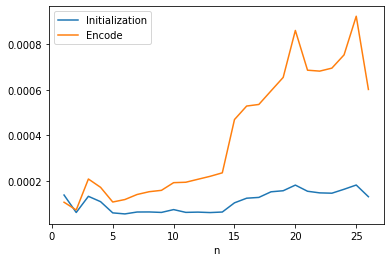

In [10]:
df.plot(x ='n', y=[1,2], kind = 'line')
plt.show()

Focusing on smaller timings:

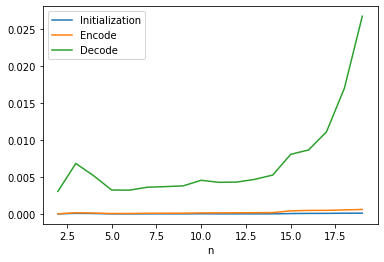

In [11]:
df[1:19].plot(x ='n', y=[1,2,3], kind = 'line')
plt.show()

Numerical values:

In [12]:
df

,n,Initialization,Encode,Decode
0,1,0.000139,0.000107,0.006128
1,2,0.000062,0.000073,0.003100
2,3,0.000133,0.000209,0.006871
3,4,0.000110,0.000173,0.005204
4,5,0.000060,0.000108,0.003284
5,6,0.000056,0.000119,0.003263
6,7,0.000064,0.000141,0.003663
7,8,0.000064,0.000153,0.003740
8,9,0.000062,0.000159,0.003844
9,10,0.000075,0.000193,0.004595
